A. IMPORT DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Split

In [63]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  builtins.input = self._sys_raw_input


In [64]:
import pandas as pd

In [55]:
!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.26.0 which is incompatible.


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Hasil_Predict.csv')
df.head(5)

,Unnamed: 0,rating,Stemming,Predicted_Labels
0,0,1.0,datang ukur,positif
1,1,1.0,pesan hitam datatang putih,positif
2,2,2.0,parah anak,negatif
3,3,1.0,datang ukran anak,positif
4,4,1.0,paket kirain gede datang kaybaju kls kecewa,positif


In [12]:
positive_data = df[df['Predicted_Labels'] == 'negatif']

In [13]:
positive_data

,Unnamed: 0,rating,Stemming,Predicted_Labels
2,2,2.0,parah anak,negatif
5,5,1.0,baju anak,negatif
9,9,1.0,jelek sesuai harapam nyesel beli kirain bagus ...,negatif
10,10,1.0,jelek sesuai dos dldmdmslsdkdod nsks sodhd sksos,negatif
38,38,2.0,baju kecil,negatif
...,...,...,...,...
9674,9675,5.0,kecil kepake kecewa,negatif
11787,11788,5.0,bahan kecewa kirim inisiatif kasih tahu chat,negatif
12364,12365,5.0,bahan bagustebal pendek pakai anak,negatif
12487,12488,4.0,jilbab pendek kayak ukur anak maaf foto sesuai,negatif


In [14]:
positive_data.to_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Negatif_Hasil_Predict.csv', index=False)

### LDA

In [135]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/BusanaMuslim/Predict_LR_NoCG/Negatif_Hasil_Predict.csv')
df2.head(5)

,Unnamed: 0,rating,Stemming,Predicted_Labels
0,2,2.0,parah anak,negatif
1,5,1.0,baju anak,negatif
2,9,1.0,jelek sesuai harap nyesel beli kirain bagus tipis,negatif
3,10,1.0,jelek sesuai dos,negatif
4,38,2.0,baju kecil,negatif


In [136]:
len(df2)

112

B. TOKENIZING WITH GENSIM

In [137]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
        # deacc=True removes punctuations

In [138]:
word_tokens = df2['Stemming'].values.tolist()
data_tokens = list(sent_to_words(word_tokens))

data_tokens[0:3]

[['parah', 'anak'],
 ['baju', 'anak'],
 ['jelek', 'sesuai', 'harap', 'nyesel', 'beli', 'kirain', 'bagus', 'tipis']]

C. DICTIONARY AND CORPUS

Bigram menggabungkan dua kata yang muncul berdampingan menjadi satu unit. Fungsi bigram dalam LDA adalah mempertahankan konteks antara kata-kata yang berdekatan dalam dokumen.

Trigram menggabungkan tiga kata yang muncul berdampingan menjadi satu unit. Fungsi trigram dalam LDA adalah mengidentifikasi hubungan yang lebih kompleks antara kata-kata dalam dokumen.

In [139]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [140]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)


In [141]:
from gensim import corpora, models

# create dictionary
dictionary = corpora.Dictionary(data_tokens)

# create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [142]:
print(corpus)

[[(0, 1), (1, 1)], [(0, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(6, 1), (9, 1), (11, 1)], [(2, 1), (12, 1)], [(0, 1), (13, 1)], [(6, 1), (8, 1), (9, 1), (14, 1), (15, 1)], [(12, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(8, 1), (9, 1), (16, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(9, 1), (22, 1), (23, 1), (28, 1)], [(9, 1), (10, 1), (13, 1), (16, 1)], [(6, 1), (29, 1), (30, 1)], [(1, 1), (12, 1), (20, 1), (31, 1)], [(2, 1), (9, 1), (12, 1), (20, 1)], [(25, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(2, 1), (4, 1), (9, 1), (10, 1), (23, 1), (25, 1), (34, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(2, 1), (10, 1), (23, 1), (29, 1)], [(2, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(6, 1), (10, 1), (31, 1)], [(2, 1), (20, 1), (60, 1)], [(6, 1), (9, 1), (10, 1), (2

In [143]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
print(corpus_tfidf[0])

[(0, 0.524897519563362), (1, 0.8511654327780411)]


D. COHERENCE SCORE

In [195]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary,
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens,
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())

  return model_list, coherence_values

In [206]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus_tfidf,
                                                    data_tokens, num_topics)

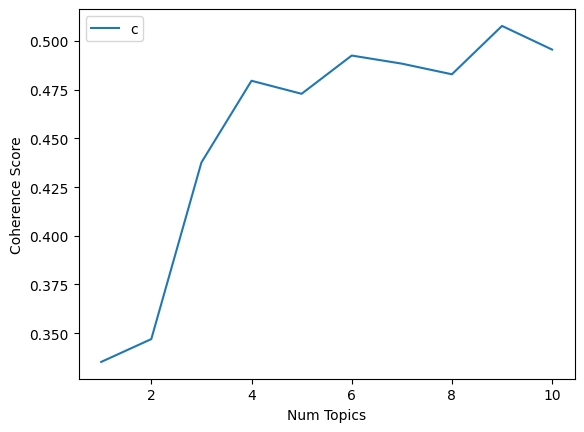

In [207]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
# plt.savefig('/content/drive/MyDrive/dataset/Klasifikasi_shoppe/Data2(Preprocessing)/Klasifikasi/dinnalul/positif/2hasil_positif_cv3.png')
plt.show()

In [160]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)),
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.335230
1,2,0.326613
2,3,0.416967
3,4,0.498141
4,5,0.492941
5,6,0.496456
6,7,0.494684
7,8,0.497929
8,9,0.482365
9,10,0.492008


In [208]:
coherence_df.to_csv('LF_Coherence_negatif.csv', index=False)

E. MODEL

In [209]:
# build LDA Model
model = LdaModel(corpus=corpus, num_topics=4, id2word=dictionary)

In [210]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.072*"kecewa" + 0.058*"baju" + 0.057*"ukur" + 0.036*"kecil" + 0.035*"sesuai" + 0.034*"anak" + 0.031*"bahan" + 0.024*"kirim" + 0.023*"kaya" + 0.018*"pakai"

Topic 2:
Word: 0.058*"tipis" + 0.047*"kecewa" + 0.046*"jelek" + 0.040*"ukur" + 0.033*"bahan" + 0.030*"oversize" + 0.027*"parah" + 0.025*"kecil" + 0.024*"kaos" + 0.023*"pendek"

Topic 3:
Word: 0.050*"tipis" + 0.046*"sesuai" + 0.037*"ukur" + 0.025*"kecil" + 0.020*"kirim" + 0.020*"besar" + 0.019*"bahan" + 0.019*"barang" + 0.017*"jelek" + 0.016*"kecewa"

Topic 4:
Word: 0.065*"kecewa" + 0.048*"anak" + 0.041*"sesuai" + 0.035*"tipis" + 0.034*"ukur" + 0.027*"bahan" + 0.022*"gambar" + 0.018*"datang" + 0.016*"baju" + 0.016*"pendek"



In [211]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [212]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=model,
                                                  corpus=corpus_tfidf,
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic',
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

<ipython-input-211-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-211-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-211-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-211-b6c81b803486>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
<ipython-input-211-b6c81b803486>:15: FutureWarni

In [213]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.6659,"tipis, kecewa, jelek, ukur, bahan, oversize, p...","[parah, anak]"
1,1,0,0.6772,"kecewa, baju, ukur, kecil, sesuai, anak, bahan...","[baju, anak]"
2,2,2,0.7869,"tipis, sesuai, ukur, kecil, kirim, besar, baha...","[jelek, sesuai, harap, nyesel, beli, kirain, b..."
3,3,0,0.6875,"kecewa, baju, ukur, kecil, sesuai, anak, bahan...","[jelek, sesuai, dos]"
4,4,0,0.6807,"kecewa, baju, ukur, kecil, sesuai, anak, bahan...","[baju, kecil]"
5,5,3,0.6608,"kecewa, anak, sesuai, tipis, ukur, bahan, gamb...","[pendek, anak]"
6,6,2,0.7491,"tipis, sesuai, ukur, kecil, kirim, besar, baha...","[tidak, sesuai, ekspetasi, jelek, nyesel]"
7,7,0,0.7558,"kecewa, baju, ukur, kecil, sesuai, anak, bahan...","[pesan, oversize, datang, malah, ukur, kecil]"
8,8,0,0.7583,"kecewa, baju, ukur, kecil, sesuai, anak, bahan...","[nyesel, datang, banget, kecewa, sesuai, gambar]"
9,9,1,0.7504,"tipis, kecewa, jelek, ukur, bahan, oversize, p...","[kirim, rok, sepan, hitam, anak]"


In [214]:
df_dominant_topic.to_csv('LF_dominant_topic_negatif.csv', index=False)

In [215]:
# Word Count of Topic Keywords

from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in data_tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

        word  topic_id  importance  word_count
0     kecewa         0    0.071882          42
1       baju         0    0.057555          23
2       ukur         0    0.056674          36
3      kecil         0    0.036381          22
4     sesuai         0    0.035237          28
5       anak         0    0.033823          22
6      bahan         0    0.030684          22
7      kirim         0    0.024384          15
8       kaya         0    0.022766           9
9      pakai         0    0.018276           9
10     tipis         1    0.057837          29
11    kecewa         1    0.046760          42
12     jelek         1    0.046160          16
13      ukur         1    0.039998          36
14     bahan         1    0.032661          22
15  oversize         1    0.030178          11
16     parah         1    0.026530           8
17     kecil         1    0.025288          22
18      kaos         1    0.023606           6
19    pendek         1    0.022937          11
20     tipis 

In [216]:
df_imp = pd.DataFrame(df_imp_wcount)
df_imp

,word,topic_id,importance,word_count
0,kecewa,0,0.071882,42
1,baju,0,0.057555,23
2,ukur,0,0.056674,36
3,kecil,0,0.036381,22
4,sesuai,0,0.035237,28
5,anak,0,0.033823,22
6,bahan,0,0.030684,22
7,kirim,0,0.024384,15
8,kaya,0,0.022766,9
9,pakai,0,0.018276,9


In [217]:
df_imp.to_csv('wordcount_LF_negatif.csv', index=False)

F. pyLDAvis

In [53]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvico

In [54]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.2
    Uninstalling pandas-2.1.2:
      Successfully uninstalled pandas-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [218]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-negatif-LF.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.046746  0.045332       1        1  35.637725
1     -0.016856 -0.061751       2        1  24.082808
2     -0.075567  0.032248       3        1  21.398353
3      0.045676 -0.015830       4        1  18.881115, topic_info=        Term       Freq      Total Category  logprob  loglift
10     tipis   8.000000   8.000000  Default  30.0000  30.0000
66      kaos   2.000000   2.000000  Default  29.0000  29.0000
2       baju   6.000000   6.000000  Default  28.0000  28.0000
0       anak   6.000000   6.000000  Default  27.0000  27.0000
23    kecewa  12.000000  12.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
18  oversize   0.440458   3.618147   Topic4  -4.6276  -0.4389
25     kirim   0.444378   4.480941   Topic4  -4.6188  -0.6439
6      jelek   0.407470   5.107936   Topic4  -4.7055  -0.8616
73     orang 

In [219]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.046746  0.045332       1        1  35.637725
1     -0.016856 -0.061751       2        1  24.082808
2     -0.075567  0.032248       3        1  21.398353
3      0.045676 -0.015830       4        1  18.881115, topic_info=        Term       Freq      Total Category  logprob  loglift
10     tipis   8.000000   8.000000  Default  30.0000  30.0000
66      kaos   2.000000   2.000000  Default  29.0000  29.0000
2       baju   6.000000   6.000000  Default  28.0000  28.0000
0       anak   6.000000   6.000000  Default  27.0000  27.0000
23    kecewa  12.000000  12.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
18  oversize   0.440458   3.618147   Topic4  -4.6276  -0.4389
25     kirim   0.444378   4.480941   Topic4  -4.6188  -0.6439
6      jelek   0.407470   5.107936   Topic4  -4.7055  -0.8616
73     orang   0.392005   2.019942   Topic4  -4.7442   0.0275
60      beda   0.388032   1.425163   Topic4  -4.7544   0.3661

[243 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.444400      anak
0         2  0.148133      anak
0         4  0.296267      anak
3         3  0.951505     bagus
29        1  0.448921     bahan
...     ...       ...       ...
20        2  0.190113      ukur
20        3  0.190113      ukur
20        4  0.190113      ukur
28        4  1.094874  ukuranya
113       1  0.681855     warna

[110 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

G. WORCLOUD TOPIC

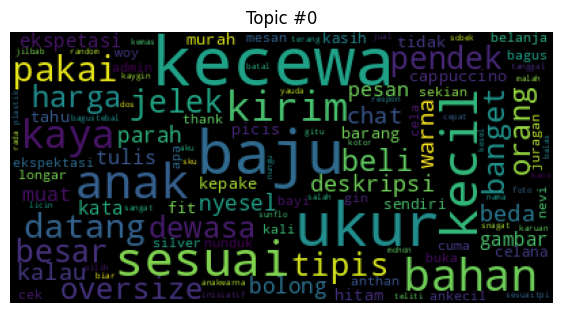

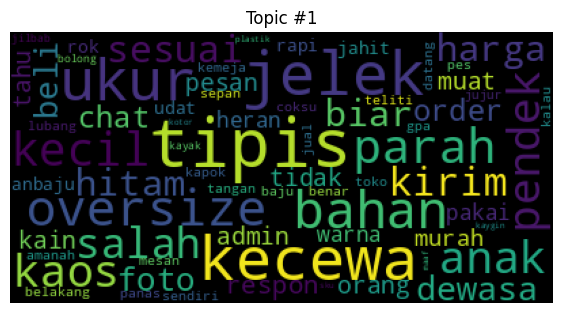

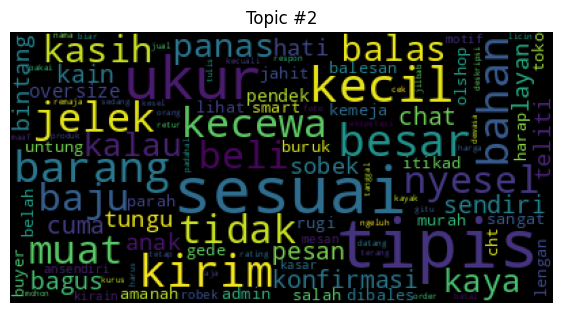

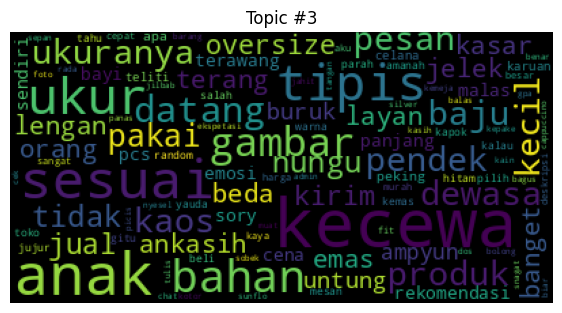

In [220]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-negatif-LF-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()